### [3주차 과제]
- 14기 김유민
- 사용 데이터 : 2주차에 진행한 wine_data
- 총 3가지 종류의 와인 분류 예측


추가로 
- torch.utils.data.Dataset
- torch.utils.data.DatLoader

( + torch.utils.data.Sampler : 배치 구성 방법 정의)  

Dataset을 통해서 data를 정의하고,  
Dataloader를 통해서 배치 iteration 을 손쉽게 함  

### 0. 데이터 불러오기

In [4]:
# scikit-learn 라이브러리 임포트
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [7]:
# class를 int취급
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="int")
df['class'] = sy

In [8]:
# class를 카테고리로 취급
#wine = load_wine()
#df = pd.DataFrame(wine.data, columns=wine.feature_names)
#sy = pd.Series(wine.target, dtype="category")
#sy = sy.cat.rename_categories(wine.target_names)
#df['class'] = sy

In [9]:
df.shape

(178, 14)

In [10]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


- feature
    + alcohol : 알콜
    + malic_acid : 말산
    + ash : 회분
    + alcalinity_of_ash : 회분의 알칼리도
    + magnesium : 마그네슘
    + total_phenols : 총 폴리페놀
    + flavanoids : 플라보노이드 폴리페놀
    + nonflavanoid_phenols : 비 플라보노이드 폴리페놀
    + proanthocyanins : 프로안토시아닌
    + color_intensity : 색상의 강도
    + hue : 색상
    + od280/od315_of_diluted_wines : 희석 와인의 OD280/OD315 비율 
    + proline : 프롤린

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


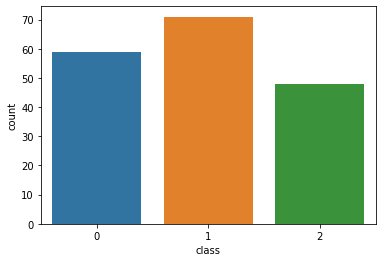

In [11]:
sns.countplot(df['class']);

In [12]:
#결측값 없음
df.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
class                           False
dtype: bool

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

### 01. 전처리 아이디어



##### 1) 상관계수 기준

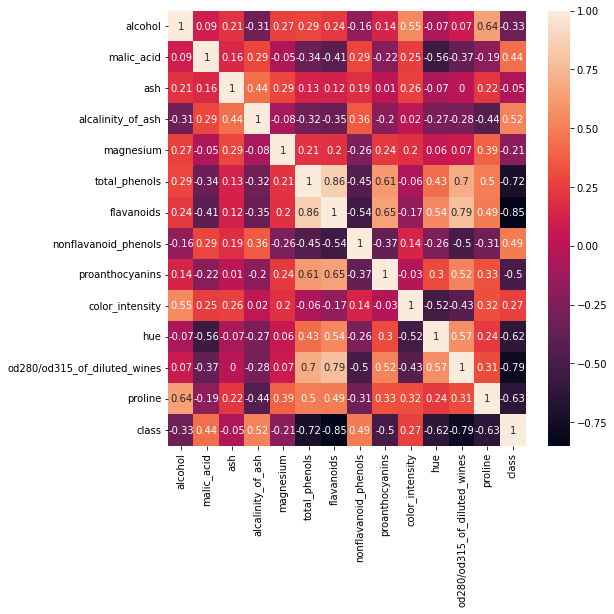

In [14]:
plt.figure(figsize=(8, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [15]:
df.drop('total_phenols', axis=1, inplace =True) # 상관된 피쳐 제거하기

- 상관계수 가장 높은 항목은 Total_phenols - Flavanoids => 0.86
- 둘 중 하나 drop하기

##### 2) 변수 중요도 기준으로 drop - 간단하게 Random Forest로 알아봄

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022, stratify=y)

In [17]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train) 
X_test = scaler1.transform(X_test) 
#dataframe형태로 변환
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


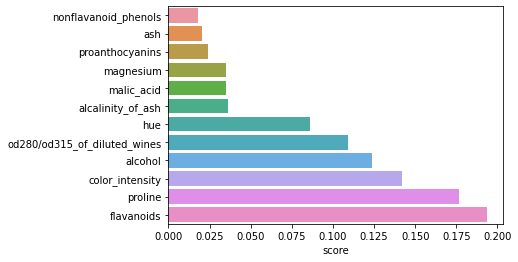

In [18]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(64)
model_feature_importance = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train).feature_importances_
feature_scores = pd.DataFrame({'score':model_feature_importance}, index=list(X_train.columns)).sort_values('score')
sns.barplot(feature_scores['score'], feature_scores.index)

- => 상위 6개 항목(flavanoids, proline, color_intensity, alcohol, od280/od315_of_diluted_wines, hue) 만 사용해보기

##### 3) 최종 데이터

In [19]:
column_sets = ['flavanoids', 'proline', 'color_intensity', 'alcohol', 'od280/od315_of_diluted_wines', 'hue','class']
wine_data = df[column_sets]

In [20]:
wine_data.shape

(178, 7)

In [21]:
wine_data.head()

,flavanoids,proline,color_intensity,alcohol,od280/od315_of_diluted_wines,hue,class
0,3.06,1065.0,5.64,14.23,3.92,1.04,0
1,2.76,1050.0,4.38,13.20,3.40,1.05,0
2,3.24,1185.0,5.68,13.16,3.17,1.03,0
3,3.49,1480.0,7.80,14.37,3.45,0.86,0
4,2.69,735.0,4.32,13.24,2.93,1.04,0


- 현재 input 변수는 6개! 예측할 class 종류는 3개!

### 02. 분류학습 - pytorch

In [30]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
from torch.utils.data import  Dataset, TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [23]:
# 연산 방법 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
torch.cuda.is_available()

True

- train, test 데이터 준비 -> scaling

In [240]:
# train / test 나누기
input = wine_data.drop('class', axis=1).values
output = wine_data['class'].values
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.33, random_state = 42,stratify=output, shuffle=True)

#train이 119개, test가 59개
print(len(X_train))
print(len(X_test))

119
59


In [25]:
print(y_train)

[0 0 0 0 1 0 2 1 2 0 1 2 1 1 0 0 0 1 1 0 1 1 1 1 2 2 1 0 2 1 2 1 0 2 1 1 1
 1 1 0 0 0 0 0 0 1 1 2 0 2 1 0 1 2 0 2 1 1 1 0 1 0 1 1 0 2 2 0 0 1 2 0 0 2
 1 1 2 2 2 2 1 1 0 0 1 1 2 2 1 1 2 0 0 0 2 1 2 1 2 2 0 1 1 0 1 1 2 0 2 0 0
 1 1 2 0 2 1 2 1]


In [26]:
print(X_train[0])
print(y_train[0])

[2.760e+00 1.320e+03 5.600e+00 1.375e+01 2.900e+00 1.150e+00]
0


In [27]:
# label balance 확인
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 39, 1: 48, 2: 32}

In [241]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train) 
X_test = scaler1.transform(X_test) 

#### 1) CASE 1. `Tensor Dataset` 사용

- from torch.utils.data import TensorDataset, DataLoader

- `TensorDataset`은 Dataset을 상속한 클래스로 학습 데이터 X와 레이블 Y를 묶어 놓은 컨테이너. `TensorDataset`을 `DataLoader`에 전달하면 for 루프에서 데이터의 일부만 간단하게 추출 가능. 


In [55]:
#파이토치 텐서로 변환
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [56]:
# Dataset 작성
ds = TensorDataset(X_train,y_train)

# 데이터 순서를 섞어서 16개씩 데이터를 반환하는 DataLoader
loader = DataLoader(ds, batch_size= 16, shuffle= True)

##### Modeling

- 모델링 진행 : 모델은 지난 시간과 동일하게 사용, optimizer를 adam으로 변경, learnig_rate = 0.01

In [57]:
 model = nn.Sequential(
          nn.Linear(6, 50, bias=True), # input_layer = 6, hidden_layer1 = 50
          nn.Sigmoid(),
          nn.Linear(50, 50, bias=True), # hidden_layer1 = 50, hidden_layer2 = 50
          nn.Sigmoid(),
          nn.Linear(50, 3, bias=True), # hidden_layer2 = 50, output_layer = 3
          nn.Softmax()
          ).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []
for epoch in range(300):
    runningLoss = 0.0
    for batchX, batchY in loader:
        optimizer.zero_grad()
        # batchX, batchY는 16개씩 받습니다.
        yPred = model(batchX)
        loss = lossFunc(yPred, batchY)
        loss.backward()
        optimizer.step()
        runningLoss += loss.item()
    losses.append(runningLoss)

        # 10의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 10 == 0:
        print(epoch, loss.item())

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 1.1965943574905396
10 0.6527087092399597
20 0.5867996215820312
30 0.6150122880935669
40 0.5537117123603821
50 0.5517071485519409
60 0.5612595677375793
70 0.5629735589027405
80 0.5515080094337463
90 0.6576783061027527
100 0.5515050888061523
110 0.5548333525657654
120 0.5542901754379272
130 0.5527821779251099
140 0.5515560507774353
150 0.5531764030456543
160 0.5521584153175354
170 0.5514491200447083
180 0.551453173160553
190 0.5514837503433228
200 0.5529194474220276
210 0.5525949597358704
220 0.5514499545097351
230 0.5515521168708801
240 0.5514764189720154
250 0.5519553422927856
260 0.5515096783638
270 0.5514549612998962
280 0.5514644980430603
290 0.551449179649353


In [49]:
with torch.no_grad():

    model = model.to('cpu')
    y_pred = model(X_test)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    print(f'model의 output은 :  {y_pred[0]}' )
    print(f'argmax를 한 후의 output은 {predicted[0]}')
    accuracy = (accuracy_score(predicted,y_test))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [4.0877413e-09 1.0000000e+00 2.6743226e-11]
argmax를 한 후의 output은 1
accuracy는 0.9661016949152542


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


-  batch_size는 16, TensorDataset으로 작성한 결과 성능은 0.966

#### 2) CASE 2.Custom Dataset으로 정의 

- 사용자가 원하는 방식의 custom dataset이 필요하다면 ! 
- __init__ : class 에서 객체가 생성되면 바로 실행되는 함수  
- __len__ : observation 수를 정의하는 함수 
- __getitem__ : iteration 마다 해당하는 데이터를 돌려주는 함수

In [242]:
class CustomDataset(Dataset):
  def __init__(self):
    
    self.x_data = X_train
    self.y_data = [[y] for y in y_train]

  def __len__(self):

    return len(self.x_data)

  def __getitem__(self, idx):

    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)

    return x,y

In [243]:
batch_size = 16

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) #sampler를 만들었다면, sampler를 파라미터로 넣어줄 수 있음 

##### Modeling
- __init__ : 초기 생성 함수
- __foward__ : 순전파(입력값 => 예측값 의 과정)
- **활성화 함수 종류** : nn.Sigmoid() / nn.ReLU() / nn.tanH() / nn.LeakyReLU() 등

In [244]:
 model = nn.Sequential(
          nn.Linear(6, 50, bias=True), # input_layer = 6, hidden_layer1 = 50
          nn.Sigmoid(),
          nn.Linear(50, 50, bias=True), # hidden_layer1 = 50, hidden_layer2 = 50
          nn.Sigmoid(),
          nn.Linear(50, 3, bias=True), # hidden_layer2 = 50, output_layer = 3
          nn.Softmax()
          ).to(device)

In [160]:
#활성화함수:sigmoid함수 -> 성능은 0.966으로 상승
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(6, 50, bias=True), 
          nn.Sigmoid(),

    )
    self.layer2 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(50, 50, bias=True),
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(50, 3, bias=True),
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [161]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [245]:
#활성화함수 : 렐루 Relu함수 -> 성능이 0.983으로 상승
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(6, 50, bias=True),
          nn.ReLU(),
          nn.BatchNorm1d(50)

    )
    self.layer2 = nn.Sequential(
          nn.Linear(50, 50, bias=True), 
          nn.ReLU(),
          nn.BatchNorm1d(50)
    )
    self.layer3 = nn.Sequential(
          nn.Linear(50, 50, bias=True),
          nn.ReLU(),
          nn.BatchNorm1d(50)
    )

    self.layer4 = nn.Sequential(
        nn.Linear(50, 3, bias=True),
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

- 가중치 초기화 방법 : 주로 **Xavier와 He Initialization**

- Xavier Initialization : xavier_uniform, xavier_normal, 주로 sigmoid, tanh와 함께

- Activation Function으로 ReLU를 사용하고, Xavier Initialization을 해줄 경우 weights의 분포가 대부분이 0이 되어버리는 Collapsing 현상이 일어난다. 이러한 문제점을 해결하는 방법으로 He initialization 사용 (https://kjhov195.github.io/2020-01-07-weight_initialization/) 

- He Initialization : kaiming_uniform, kaiming_normal 



In [246]:
# kaiming_uniform(layer.weight) 사용
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.kaiming_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [247]:
model = Model().to(device)
model.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  after removing the cwd from sys.path.


Model(
  (layer1): Sequential(
    (0): Linear(in_features=6, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [248]:
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1) #성능 0.983
#optimizer = optim.Adam(model.parameters(), lr=0.1)
# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
#optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# Adam 등등 

In [249]:
losses = []
for epoch in range(300):

  for x, y in dataloader:
    optimizer.zero_grad()
    x = x.to(device)
    y = y.to(device)

    # forward 연산
    hypothesis = model(x)

    # 비용 함수
    y = y.squeeze()
    cost = loss(hypothesis, y)
    cost.backward()
    optimizer.step()
  losses.append(cost.item()) # 값만 가져오기 위해서 .item()

  # 10의 배수에 해당되는 에포크마다 비용을 출력
  if epoch % 10 == 0:
      print(epoch, cost.item())

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 0.7635835409164429
10 0.5604991912841797
20 0.5555886626243591
30 0.5539759993553162
40 0.5532453656196594
50 0.552834153175354
60 0.552575945854187
70 0.552398145198822
80 0.5522695183753967
90 0.5521727800369263
100 0.5520957112312317
110 0.5520327091217041
120 0.5519809722900391
130 0.5519371032714844
140 0.551899790763855
150 0.5518678426742554
160 0.5518395304679871
170 0.5518144369125366
180 0.5517926216125488
190 0.551772952079773
200 0.5517554879188538
210 0.5517390966415405
220 0.5517243146896362
230 0.5517110228538513
240 0.5516985058784485
250 0.5516868829727173
260 0.5516762733459473
270 0.5516664981842041
280 0.5516570806503296
290 0.5516484975814819


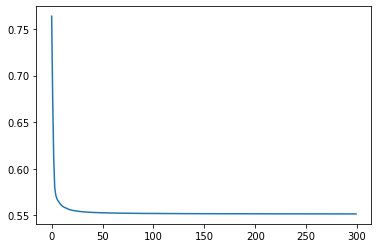

In [250]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [251]:
with torch.no_grad():

    model = model.to('cpu')
    X_test = torch.FloatTensor(X_test)
    y_pred = model(X_test)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    print(f'model의 output은 :  {y_pred[0]}' )
    print(f'argmax를 한 후의 output은 {predicted[0]}')
    accuracy = (accuracy_score(predicted,y_test))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [1.3719368e-04 9.9973053e-01 1.3224169e-04]
argmax를 한 후의 output은 1
accuracy는 0.9830508474576272


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


- auc : 0.983

##### if,  imbalanced data -> weight 부여

In [110]:
from sklearn.utils.class_weight import compute_class_weight
label = [0] * 39 + [1] * 48 + [2] * 32
compute_class_weight(class_weight = "balanced" ,  classes=np.unique(output), y = output)

array([1.00564972, 0.83568075, 1.23611111])

In [111]:
class_weights= compute_class_weight(class_weight = "balanced" ,  classes=np.unique(output), y = output)
class_weights=torch.tensor(class_weights,dtype=torch.float).to(device)

- 손실함수, optimizer 

In [138]:
loss_fn = nn.CrossEntropyLoss(weight=class_weights).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)
# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# Adam 등등 

In [139]:
losses = []
for epoch in range(300):

  for x, y in dataloader:
    optimizer.zero_grad()
    x = x.to(device)
    y = y.to(device)

    # forward 연산
    hypothesis = model(x)

    # 비용 함수
    y = y.squeeze()
    cost = loss(hypothesis, y)
    cost.backward()
    optimizer.step()
  losses.append(cost.item()) # 값만 가져오기 위해서 .item()

  # 10의 배수에 해당되는 에포크마다 비용을 출력
  if epoch % 10 == 0:
      print(epoch, cost.item())

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 0.7306442856788635
10 0.5583861470222473
20 0.5551413297653198
30 0.5539613366127014
40 0.5533339977264404
50 0.5529492497444153
60 0.5526889562606812
70 0.5525030493736267
80 0.5523642301559448
90 0.5522567629814148
100 0.5521706938743591
110 0.5521001815795898
120 0.5520418882369995
130 0.5519936680793762
140 0.5519520044326782
150 0.5519159436225891
160 0.5518822073936462
170 0.5518512725830078
180 0.5518248677253723
190 0.5518022775650024
200 0.5517821907997131
210 0.5517640709877014
220 0.5517479777336121
230 0.5517331957817078
240 0.5517198443412781
250 0.5517076253890991
260 0.5516963601112366
270 0.5516861081123352
280 0.5516765713691711
290 0.5516678690910339


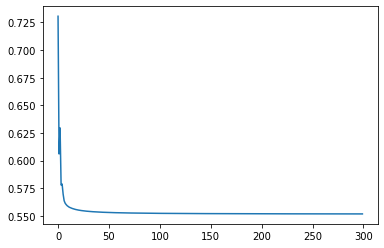

In [140]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [141]:
with torch.no_grad():

    model = model.to('cpu')
    X_test = torch.FloatTensor(X_test)
    y_pred = model(X_test)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    print(f'model의 output은 :  {y_pred[0]}' )
    print(f'argmax를 한 후의 output은 {predicted[0]}')
    accuracy = (accuracy_score(predicted,y_test))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [8.5841637e-04 9.9876499e-01 3.7659722e-04]
argmax를 한 후의 output은 1
accuracy는 0.9830508474576272


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


=>  성능 : 0.9830508474576272

-아쉬운점: relu로 수정 시 성능이 만족스럽게 좋게 나와서 다른 활성화 함수들로 다양히 적용해보진 않았다. 